## AirBnB Listing Analysis
Analyze AirBnB listings in Paris to determine the impact of recent regulations

#### Airbnb Listings & Reviews
Airbnb data for 250,000+ listings in 10 major cities, including information about hosts, pricing, location, and room type, along with over 5 million historical reviews.

NOTE: Prices are in local currency

#### Recommended Analysis

 - Can you spot any major differences in the Airbnb market between cities?

 - Which attributes have the biggest influence in price?

 - Are you able to identify any trends or seasonality in the review data?

 - Which city offers a better value for travel?

In [18]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [20]:
# AirBnB listing Data
airbnb = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Listings.csv', encoding = 'latin1', low_memory=False)

In [21]:
# dimensions of data
airbnb.shape

(279712, 33)

In [22]:
airbnb.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [23]:
# datatypes
airbnb.dtypes

,0
listing_id,int64
name,object
host_id,int64
host_since,object
host_location,object
host_response_time,object
host_response_rate,float64
host_acceptance_rate,float64
host_is_superhost,object
host_total_listings_count,float64


In [24]:
# convert to datetime
airbnb['host_since'] = pd.to_datetime(airbnb['host_since'])

In [25]:
# take into consideration only specified columns
paris_listing = airbnb[airbnb['city']=='Paris'][['host_since', 'neighbourhood', 'city', 'accommodates', 'price']]

In [26]:
# check new dataframe
paris_listing.head()

,host_since,neighbourhood,city,accommodates,price
0,2011-12-03,Buttes-Montmartre,Paris,2,53
1,2013-11-29,Buttes-Montmartre,Paris,2,120
2,2014-07-31,Elysee,Paris,2,89
3,2013-12-17,Vaugirard,Paris,2,58
4,2014-12-14,Passy,Paris,2,60


In [27]:
# dimensions
paris_listing.shape

(64690, 5)

In [28]:
# descriptive statistics
paris_listing.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
host_since,64657,NaN,NaN,NaN,2015-11-01 11:06:05.528867584,2008-08-30 00:00:00,2014-03-09 00:00:00,2015-07-07 00:00:00,2017-05-29 00:00:00,2021-02-07 00:00:00,NaN
neighbourhood,64690,20,Buttes-Montmartre,7237,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city,64690,1,Paris,64690,NaN,NaN,NaN,NaN,NaN,NaN,NaN
accommodates,64690.0,NaN,NaN,NaN,3.037997,0.0,2.0,2.0,4.0,16.0,1.588766
price,64690.0,NaN,NaN,NaN,113.096445,0.0,59.0,80.0,120.0,12000.0,214.433668


In [29]:
# check for null/missing values
paris_listing.isnull().sum()

,0
host_since,33
neighbourhood,0
city,0
accommodates,0
price,0


In [30]:
# duplicate records
paris_listing.duplicated().sum()

2113

In [31]:
# drop duplicates
paris_listing.drop_duplicates(inplace=True)

In [32]:
# dimensions of the new dataframe
paris_listing.shape

(62577, 5)

In [39]:
# create a column host_year
paris_listing['host_year'] = paris_listing['host_since'].dt.year

#### Objective 2: Task 1: Create a table named paris_listings_neighbourhood that groups Paris listings by 'neighbourhood' and calculates the mean price (sorted low to high)

In [33]:
paris_listing_neighbourhood = paris_listing.groupby('neighbourhood').agg({'price':'mean'}).sort_values(by='price', ascending=True).reset_index()
paris_listing_neighbourhood

,neighbourhood,price
0,Menilmontant,75.447411
1,Buttes-Chaumont,80.914840
2,Buttes-Montmartre,87.554281
3,Reuilly,89.464821
4,Popincourt,90.812583
5,Gobelins,98.439156
6,Observatoire,102.134292
7,Batignolles-Monceau,102.659549
8,Enclos-St-Laurent,103.074338
9,Vaugirard,106.854306


#### Objective 2 - Task 2 - Create a table named paris_listings_accomodations, filter down to the most expensive neighborhood, group by the ‘accommodations’ column, and add the mean price for each value of ‘accommodates’ (sorted low to high)

In [34]:
paris_listing_accomodations = paris_listing[paris_listing['neighbourhood']=='Elysee'].groupby('accommodates').agg({'price':'mean'}).sort_values(by='price', ascending=True).reset_index()
paris_listing_accomodations

,accommodates,price
0,0,0.000000
1,1,80.465116
2,3,153.338028
3,2,157.237037
4,4,213.654788
5,5,330.086420
6,6,357.682081
7,8,395.500000
8,7,411.538462
9,9,440.272727


#### Objective 2: Task 3: Create a table called paris_listings_over_time grouped by the ‘host_since’ year, and calculate the average price and count of rows representing the number of new hosts

In [40]:
paris_listings_over_time = paris_listing.groupby('host_year').agg({'price':'mean', 'host_since':'count'}).sort_values(by='host_since', ascending=False).reset_index()
paris_listings_over_time

,host_year,price,host_since
0,2015.0,104.193837,11747
1,2014.0,100.501979,10614
2,2016.0,112.030462,8601
3,2013.0,106.856674,7926
4,2019.0,131.684152,5376
5,2012.0,111.948741,4487
6,2017.0,108.897105,4422
7,2018.0,138.969631,4149
8,2020.0,137.735583,3260
9,2011.0,125.110015,1318


#### Objective 3: Task 1: Create a horizontal bar chart of the average price by neighborhood in Paris, and make sure to add a title and change axis labels as needed

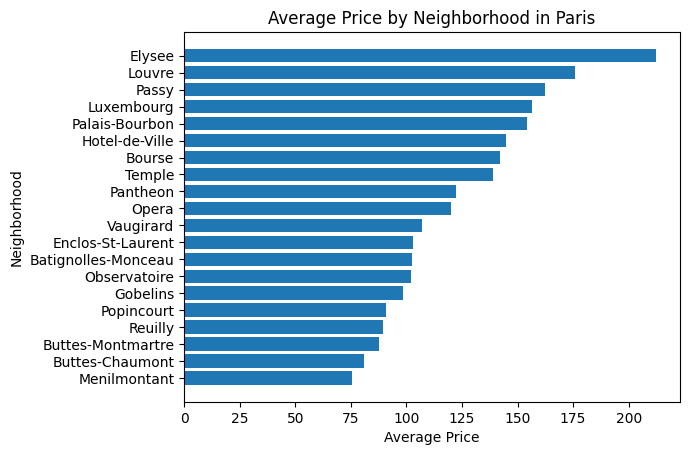

In [41]:
plt.barh(paris_listing_neighbourhood['neighbourhood'], paris_listing_neighbourhood['price'])
plt.title('Average Price by Neighborhood in Paris')
plt.xlabel('Average Price')
plt.ylabel('Neighborhood')
plt.show()